<a href="https://colab.research.google.com/github/mahshidyaghoobzadeh/Recommendation_p/blob/main/mask_with_CNN_and_hybrid_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from nltk import tokenize
from operator import itemgetter
import math
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [ ]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv('/content/dataset_facemask_with_target1.csv')
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()
print(df.shape)

(536, 17)


In [ ]:
text = []
for i in range(df['How to make or use'].shape[0]):
  text.append(df['How to make or use'][i])


In [ ]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
for i in symbols:
    data = np.char.replace(text, i, ' ')


In [ ]:
def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

In [ ]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

In [ ]:
for i in range(df.shape[0]):
  doc = df['How to make or use'][i]
  total_words = doc.split()
  total_word_length = len(total_words)
  print("total number of word is :",total_word_length)
  total_sentences = tokenize.sent_tokenize(doc)
  total_sent_len = len(total_sentences)
  print("Total number of sentences is :", total_sent_len)


total number of word is : 192
Total number of sentences is : 13
total number of word is : 100
Total number of sentences is : 7
total number of word is : 38
Total number of sentences is : 4
total number of word is : 38
Total number of sentences is : 3
total number of word is : 31
Total number of sentences is : 2
total number of word is : 39
Total number of sentences is : 2
total number of word is : 36
Total number of sentences is : 2
total number of word is : 31
Total number of sentences is : 3
total number of word is : 47
Total number of sentences is : 2
total number of word is : 34
Total number of sentences is : 1
total number of word is : 41
Total number of sentences is : 3
total number of word is : 42
Total number of sentences is : 3
total number of word is : 49
Total number of sentences is : 5
total number of word is : 24
Total number of sentences is : 3
total number of word is : 28
Total number of sentences is : 4
total number of word is : 53
Total number of sentences is : 5
total

In [ ]:
tf_score = {}
key_word =[]
for i in range(df.shape[0]):
  doc = df['How to make or use'][i]
  total_words = doc.split()
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
      if each_word in tf_score:
        tf_score[each_word] += 1
      else:
        tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
  idf_score = {}
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] += check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
  key_word.append(get_top_n(tf_idf_score, 1))


In [ ]:
tf_score = {}
key_word_description =[]
for i in range(df.shape[0]):
  doc = df['description'][i]
  total_words = doc.split()
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
      if each_word in tf_score:
        tf_score[each_word] += 1
      else:
        tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
  idf_score = {}
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] += check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
  key_word_description.append(get_top_n(tf_idf_score, 1))


In [ ]:
kw_decription = []
for i in range(df.shape[0]):
  for x in key_word_description[i].keys():
    kw_decription.append(x)

In [ ]:
kw = []
for i in range(df.shape[0]):
  for x in key_word[i].keys():
    kw.append(x)

In [ ]:
kw = np.array(kw)
kw.shape

(536,)

In [ ]:
kw_decription = np.array(kw_decription)
kw_decription.shape

(536,)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal_encoder = OrdinalEncoder()
kw = kw.reshape(-1,1)
kw = ordinal_encoder.fit_transform(kw)
kw_decription = kw_decription.reshape(-1,1)
kw_decription = ordinal_encoder.fit_transform(kw_decription)


In [ ]:
age =[]
a = df['age'].value_counts()
for x in  a.index:
  age.append(x)

In [ ]:
for x in age:
  if (x=='> 15') or (x=='>15') :
    i=np.where(df['age']== '> 15')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([17.5])
  if x=='> 15' :
    i=np.where(df['age']== '>15')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([17.5])
  if (x=='> 20') or (x=='>20') :
    i=np.where(df['age']== '> 20')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20') or (x=='>20') or (x=='> 20`') :
    i=np.where(df['age']== '>20')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20') or (x=='>20') or (x=='> 20`') :
    i=np.where(df['age']== '> 20`')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20 ') :
    i=np.where(df['age']== '> 20 ')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 25') or (x=='>25') :
    i=np.where(df['age']== '>25')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([27.5])
  if (x=='> 25') or (x=='>25') :
    i=np.where(df['age']== '> 25')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([27.5])
  if (x=='> 30') or (x=='>30') :
    i=np.where(df['age']== '>30')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([32.5])
  if (x=='> 30') or (x=='>30') :
    i=np.where(df['age']== '> 30')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([32.5])
  if (x=='> 12') or (x=='>12') :
    i=np.where(df['age']== '>12')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([13.5])
  if (x=='> 12') or (x=='>12') :
    i=np.where(df['age']== '> 12')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([13.5])



In [ ]:
df['age'].value_counts()

17.5    223
25.0    207
27.5     60
32.5     29
13.5     17
Name: age, dtype: int64

In [ ]:
df['label'].value_counts()

face mask       336
treatment        38
cleanser         31
oil              31
rejuvenation     30
exfoliator       24
scrub            24
toner            17
peel mask         2
cream             1
serum             1
night cream       1
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal_encoder = OrdinalEncoder()
target1=np.array(df['label'])
target1=target1.reshape(-1,1)
target_ordinal= ordinal_encoder.fit_transform(target1)
target_ordinal = target_ordinal.ravel()


In [ ]:

target=pd.get_dummies(df['label'], prefix_sep='_', drop_first=False)
target=np.array(target)
print(target.shape)


(536, 12)


In [ ]:
target_frame = pd.DataFrame(target)

In [ ]:
target_frame.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11
0  0  0  1  0  0  0  0  0  0  0   0     336
         0  0  0  0  0  0  0  0   1      38
1  0  0  0  0  0  0  0  0  0  0   0      31
0  0  0  0  0  1  0  0  0  0  0   0      31
               0  0  1  0  0  0   0      30
      1  0  0  0  0  0  0  0  0   0      24
      0  0  0  0  0  0  1  0  0   0      24
                        0  0  1   0      17
                  1  0  0  0  0   0       2
   1  0  0  0  0  0  0  0  0  0   0       1
   0  0  0  1  0  0  0  0  0  0   0       1
            0  0  0  0  0  1  0   0       1
dtype: int64

In [ ]:
df['How to make or use'] =kw
df['description']=kw_decription

In [ ]:
df['age'] = df['age'].astype('float32')

In [ ]:
df1 = df.drop('label',axis=1)

In [ ]:
!pip install category_encoders


     |████████████████████████████████| 81kB 3.9MB/s 


In [ ]:

import category_encoders as ce
c5=df1.columns
encoder5 = ce.TargetEncoder(cols=[x for x in c5])

target_encoder_all= encoder5.fit_transform(df1,target_ordinal)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[Text(0.5, 0, 'name'),
 Text(1.5, 0, 'description'),
 Text(2.5, 0, 'age'),
 Text(3.5, 0, 'Target1'),
 Text(4.5, 0, 'Target2'),
 Text(5.5, 0, 'Target3'),
 Text(6.5, 0, 'dry'),
 Text(7.5, 0, 'oily '),
 Text(8.5, 0, 'normal'),
 Text(9.5, 0, 'sensitive'),
 Text(10.5, 0, 'clear'),
 Text(11.5, 0, 'almost clear'),
 Text(12.5, 0, 'mild'),
 Text(13.5, 0, 'moderate'),
 Text(14.5, 0, 'severe'),
 Text(15.5, 0, 'How to make or use')]

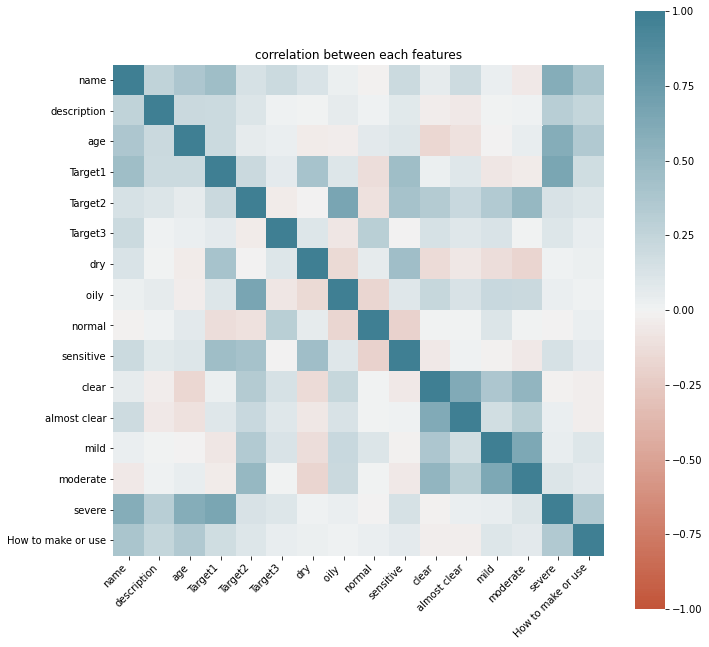

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 11))
plt.title('correlation between each features')
corr =target_encoder_all.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=target_encoder_all
y=target_ordinal
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)


(536, 16) (536,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, target)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import nn
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv1D,MaxPooling1D,Activation,Flatten,AveragePooling1D,GlobalMaxPooling1D,ZeroPadding1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(X_ros, y_ros, test_size=0.3,random_state=0)

train_set=np.array(train_set)
train_set=train_set.reshape(train_set.shape[0],train_set.shape[1],1)
test_set=np.array(test_set)
test_set=test_set.reshape(test_set.shape[0],test_set.shape[1],1)

c = int(np.round(0.8*train_set.shape[0]))
train_data=train_set[0:c]
valid_data=train_set[c:]
train_target=target_train[0:c]
valid_target=target_train[c:]
print(train_data.shape)
print(valid_data.shape)
print(train_target.shape)
print(valid_target.shape)


(2258, 16, 1)
(564, 16, 1)
(2258, 12)
(564, 12)


In [ ]:
X1, y1  = X_ros.reshape(X_ros.shape[0],X_ros.shape[1],1), y_ros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import keras

import tensorflow as tf
early_stopping_cb =  tf.keras.callbacks.EarlyStopping(patience=150,
restore_best_weights=True)
lr_scheduler1 = tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=30)

In [ ]:
n_class = 12

In [ ]:
model = Sequential()
model.add(layer=Conv1D(filters=3, kernel_size=7, activation='relu',data_format='channels_last',padding='same'))
model.add(layer=Conv1D(filters=16, kernel_size=3, activation='relu',data_format='channels_last',padding='same'))
model.add(layer=Conv1D(filters=32, kernel_size=1,strides=2, activation='relu',data_format='channels_last',padding='same'))
model.add(layer=Dropout(rate=0.35))
model.add(layer=Flatten())
model.add(layer=Dense(units=128, activation='relu'))
model.add(layer= BatchNormalization())
model.add(layer=Dropout(rate=0.40))
model.add(layer=Dense(units=56, activation='relu'))
model.add(layer= BatchNormalization())
model.add(layer=Dropout(rate=0.26))
model.add(layer=Dense(units=n_class, activation='softmax'))

In [ ]:
import tensorflow

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
51/51 - 2s - loss: 3.2404 - accuracy: 0.0995 - val_loss: 2.6040 - val_accuracy: 0.0000e+00
Epoch 2/80
51/51 - 0s - loss: 3.1665 - accuracy: 0.1076 - val_loss: 2.7848 - val_accuracy: 0.0000e+00
Epoch 3/80
51/51 - 0s - loss: 3.0371 - accuracy: 0.1132 - val_loss: 2.9052 - val_accuracy: 0.0000e+00
Epoch 4/80
51/51 - 0s - loss: 2.8952 - accuracy: 0.1296 - val_loss: 2.9540 - val_accuracy: 0.0000e+00
Epoch 5/80
51/51 - 0s - loss: 2.7492 - accuracy: 0.1597 - val_loss: 2.9495 - val_accuracy: 0.0000e+00
Epoch 6/80
51/51 - 0s - loss: 2.6130 - accuracy: 0.1808 - val_loss: 2.9047 - val_accuracy: 0.2354
Epoch 7/80
51/51 - 0s - loss: 2.5223 - accuracy: 0.2099 - val_loss: 2.8302 - val_accuracy: 0.2776
Epoch 8/80
51/51 - 0s - loss: 2.4037 - accuracy: 0.2307 - val_loss: 2.7376 - val_accuracy: 0.2776
Epoch 9/80
51/51 - 0s - loss: 2.3193 - accuracy: 0.2462 - val_loss: 2.6629 - val_accuracy: 0.2776
Epoch 10/80
51/51 - 0s - loss: 2.2293 - accuracy: 0.2750 - val_loss: 2.6283 - val_accuracy: 0.2937

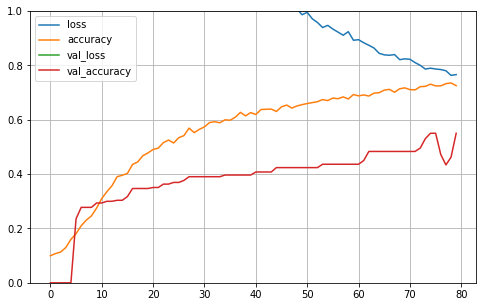

In [ ]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001 ,beta_1=0.99, beta_2=0.9), loss=['categorical_crossentropy'],metrics=['accuracy'])
history = model.fit(x=X1, y=y1, batch_size=64, epochs=80, verbose=2,validation_split=0.2)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=target_encoder_all
y=target_ordinal
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
X_ros = X_ros.reshape(X_ros.shape[0],X_ros.shape[1],1)
print(X_ros.shape)

(4032, 16, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
input_A = keras.layers.Input(shape=[train_set.shape[1],1])
y = Conv1D(1, (3),data_format='channels_last',activation='relu',padding='valid')(X_ros)
y2 = MaxPooling1D((2),padding='valid',strides=(2))(y)
y = Conv1D(1, (3),data_format='channels_last',activation='relu',padding='valid')(X_ros)
y1 = AveragePooling1D((2),padding='valid',strides=(2))(y)
print(y2.shape,y1.shape)
y3 = keras.layers.Concatenate(axis=-1)([y1, y2])
data=Flatten()(y3)
data.shape

(4032, 7, 1) (4032, 7, 1)


TensorShape([4032, 14])

In [ ]:
data =np.array(data)
data = data.astype('float32')
label = np.array(y_ros)
label = label.ravel()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_tests = train_test_split(data,label, test_size=0.3, random_state=21)
print(train_set.shape,target_train.shape, test_set.shape,target_tests.shape)

(2822, 14) (2822,) (1210, 14) (1210,)


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(train_set, target_train)
GridSearchCV(estimator=svc,
             param_grid={'C': [i for i in np.linspace(0.1,1,100)], 'kernel': ('linear', 'rbf','sigmoid')})

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.1090909090909091, 0.11818181...
                               0.24545454545454545, 0.2545454545454545,
                               0.26363636363636367, 0.2727272727272727,
                               0.28181818181818186, 0.2909090909090909, 0.3,
                               0.3090909090909091, 0.3181818181818182,
                               0.32727272727272727, 0.33636363636363636,
                               0.34545454545454546, 0.3545454545454545,
             

In [ ]:
grid = GridSearchCV(estimator=svc,param_grid={'C': [i for i in np.linspace(0.1,1,100)], 'kernel': ('linear', 'rbf','sigmoid')},refit = True, verbose = 3)
grid.fit(train_set, target_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, kernel=linear, score=0.434, total=   0.2s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.430, total=   0.2s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.433, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.459, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.572, total=   0.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.573, total=   0.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.569, total=   0.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.569, total=   0.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  7.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.1090909090909091, 0.11818181...
                               0.24545454545454545, 0.2545454545454545,
                               0.26363636363636367, 0.2727272727272727,
                               0.28181818181818186, 0.2909090909090909, 0.3,
                               0.3090909090909091, 0.3181818181818182,
                               0.32727272727272727, 0.33636363636363636,
                               0.34545454545454546, 0.3545454545454545,
             

In [ ]:
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1.0, 'kernel': 'rbf'}
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
y_pred = grid.predict(test_set)
accuracy = accuracy_score(target_tests, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 66.69%


In [ ]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
  if y_true.shape != y_pred.shape:
    print("Error! y_true %s is not the same shape as y_pred %s" % (
          y_true.shape,
          y_pred.shape)
        )
    return

  lb = LabelBinarizer()

  if len(y_true.shape) == 1:
        lb.fit(y_true)

  #Value counts of predictions
  labels, cnt = np.unique(y_pred,return_counts=True)
  n_classes = len(labels)
  pred_cnt = pd.Series(cnt, index=labels)

  metrics_summary = precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,labels=labels)

  avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred,average='weighted'))

  metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
  class_report_df = pd.DataFrame(list(metrics_summary),index=metrics_sum_index,columns=labels)

  support = class_report_df.loc['support']
  total = support.sum()
  class_report_df['avg / total'] = avg[:-1] + [total]

  class_report_df = class_report_df.T
  class_report_df['pred'] = pred_cnt
  class_report_df['pred'].iloc[-1] = total

  if not (y_score is None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for label_it, label in enumerate(labels):
      fpr[label], tpr[label], _ = roc_curve((y_true == label).astype(int), y_score[:, label_it])
      roc_auc[label] = auc(fpr[label], tpr[label])

    if average == 'micro':
      if n_classes <= 2:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score[:, 1].ravel())
      else:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score.ravel())

      roc_auc["avg / total"] = auc(fpr["avg / total"],tpr["avg / total"])

    elif average == 'macro':
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in labels]))
      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in labels:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

    class_report_df['AUC'] = pd.Series(roc_auc)

  return class_report_df


In [ ]:
!pip install scikit-plot

import scikitplot as skplt
import matplotlib.pyplot as plt

(1210,) (1210,)


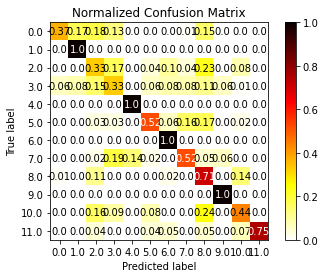

In [ ]:
probas = grid.predict(test_set)

y_testsm = target_tests.reshape(target_tests.shape[0])
y_predsm = probas.reshape(probas.shape[0])
print(y_testsm.shape,y_predsm.shape)


skplt.metrics.plot_confusion_matrix(y_testsm,y_predsm, normalize=True, cmap='hot_r')
plt.show()
